# Cloning Quasars

- Upsample this distribution in hopefully two ways (but at least one of them), using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation?

In [1]:
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities\plot_settings.py")

In [2]:
from Utilities import plot_settings 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

Plot data distribution (Histogram)

Text(0.5, 1.0, 'Histogram of Quasar Redshifts')

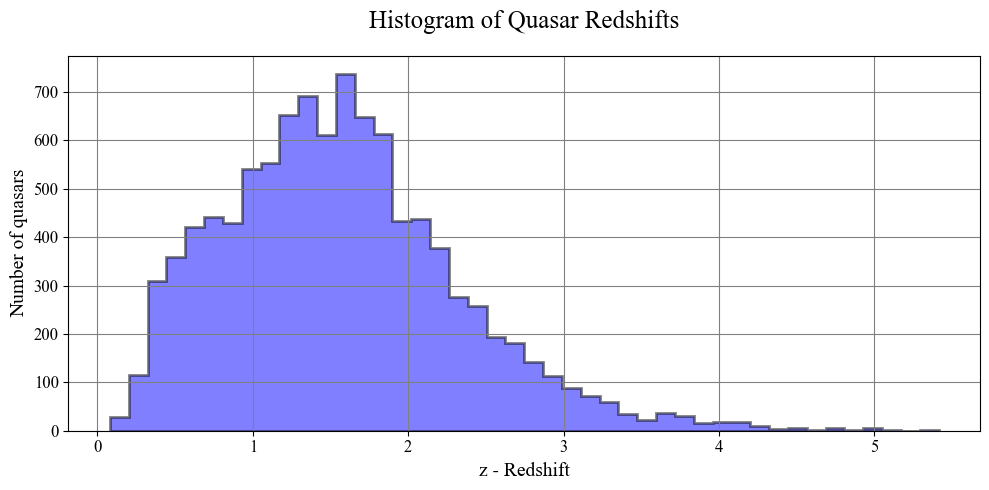

In [5]:
counts, bins, _ = plt.hist(z, bins='scott', histtype='stepfilled', color='blue', edgecolor='black', lw=2, alpha=0.5)
plt.xlabel('z - Redshift')
plt.ylabel('Number of quasars')
plt.title('Histogram of Quasar Redshifts')

## Rejection sampling

In [6]:
N = 10000

In [7]:
# Generate N numbers from a uniform distribution comprasing all values of z
x = np.random.uniform(z.min(), z.max(), N)
indeces = np.digitize(x, bins) #Which bin does each x value belong to?
y = np.random.uniform(0, counts.max(), N) # Generate N random y values between 0 and the maximum count

In [8]:
# Accept a couple of points only if the y value is below the histogram count for that bin
valids = np.array([(x[i], val) for i,val in enumerate(y) if val < counts[indeces[i] - 1]]) 

Text(0.5, 1.0, 'Histogram of Quasar Redshifts')

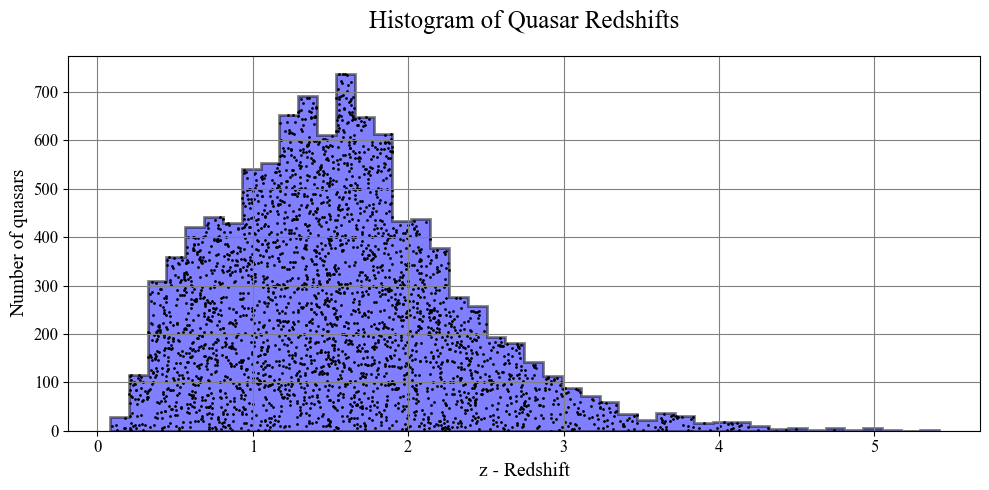

In [9]:
counts, bin_edges, _ = plt.hist(z, bins='scott', histtype='stepfilled', color='blue', edgecolor='black', lw=2, alpha=0.5)
plt.scatter(valids.T[0], valids.T[1], color='black', s=1, label='Random points below histogram')
plt.xlabel('z - Redshift')
plt.ylabel('Number of quasars')
plt.title('Histogram of Quasar Redshifts')

In [10]:
print(f'{valids.size/N * 100 :.3} % of random points below histogram counts')

61.1 % of random points below histogram counts


Check efficiency of the algorithm as N increases

In [11]:
Ns = np.power(10,np.linspace(1,6,10))

In [12]:
mean1, var1 = [], []
for N in Ns:
    # Generate N numbers from a uniform distribution comprasing all values of z
    x = np.random.uniform(z.min(), z.max(), int(N))
    indeces = np.digitize(x, bins) #Which bin does each x value belong to?
    y = np.random.uniform(0, counts.max(), int(N)) # Generate N random y values between 0 and the maximum count
    mean1.append(np.array([(x[i], val) for i,val in enumerate(y) if val < counts[indeces[i] - 1]]).T[0].mean())
    var1.append(np.array([(x[i], val) for i,val in enumerate(y) if val < counts[indeces[i] - 1]]).T[0].std())

In [13]:
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

## Inverse sampling

Compute cdf

In [14]:
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

In [15]:
cdf = np.cumsum(counts)

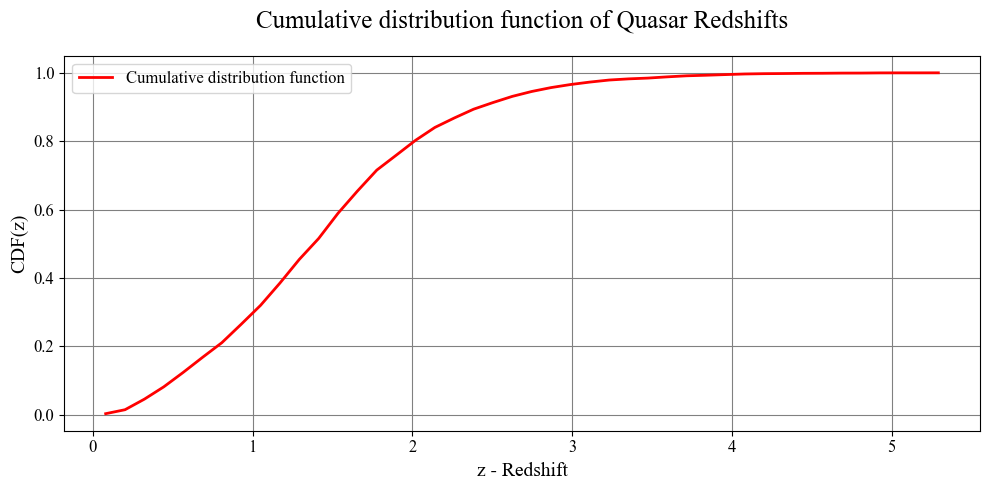

In [16]:
plt.plot(bins[:-1], cdf/cdf.max(), color='red', lw=2, label='Cumulative distribution function')
plt.xlabel('z - Redshift')
plt.ylabel('CDF(z)')
plt.title('Cumulative distribution function of Quasar Redshifts')
plt.legend()

In [17]:
u = np.random.uniform(0, 1, z.size)

In [18]:
sample = bins[np.digitize(u,cdf/cdf.max())]

Text(0.5, 1.0, 'Histogram of Quasar Redshifts')

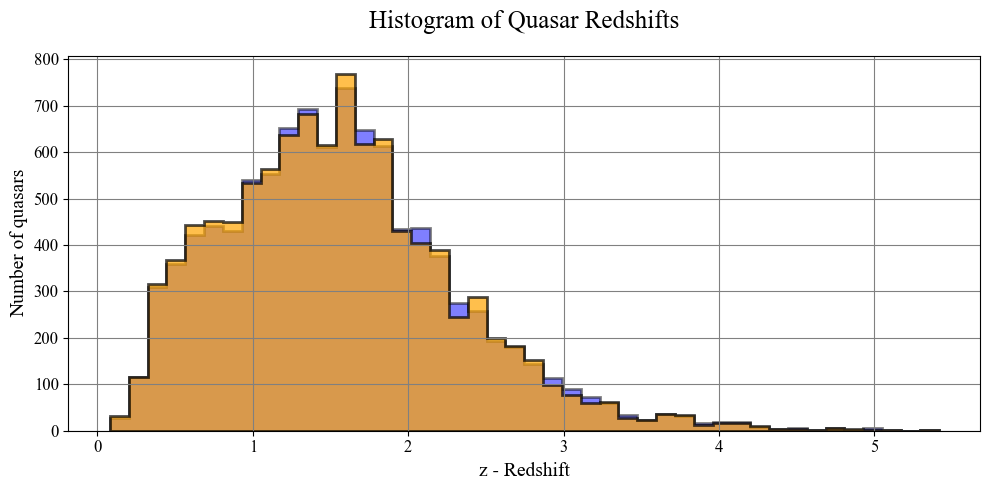

In [19]:
counts, bins, _ = plt.hist(z, bins='scott', histtype='stepfilled', color='blue', edgecolor='black', lw=2, alpha=0.5)
_,_,_ = plt.hist(sample, bins, histtype='stepfilled', color='orange', edgecolor='black', lw=2, alpha=0.7)
plt.xlabel('z - Redshift')
plt.ylabel('Number of quasars')
plt.title('Histogram of Quasar Redshifts')

In [20]:
mean2, var2 = [], []
for n in Ns:
    u = np.random.uniform(0, 1, int(n))
    sample = bins[np.digitize(u,cdf/cdf.max())]
    mean2.append(sample.mean())
    var2.append(sample.std())

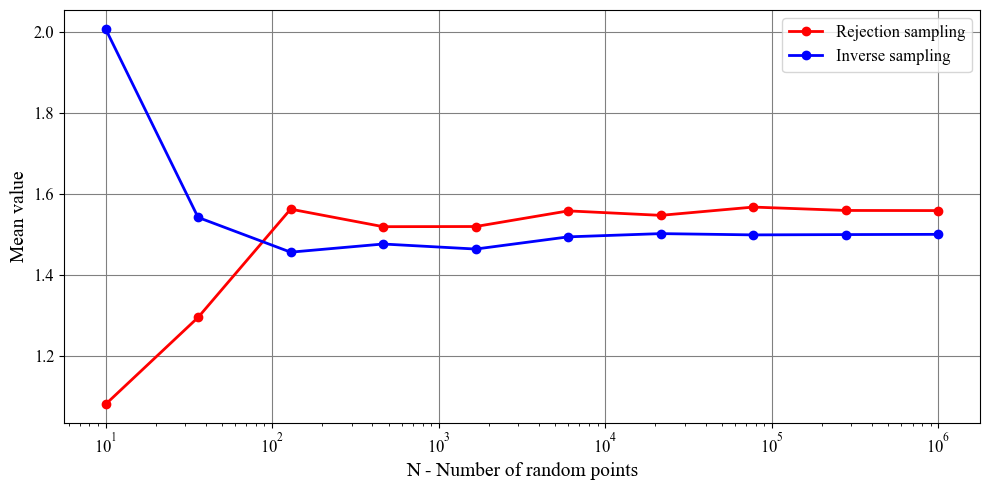

In [21]:
plt.plot(Ns, mean1, marker='o', color='red', lw=2, label='Rejection sampling')
plt.plot(Ns, mean2, marker='o', color='blue', lw=2, label='Inverse sampling')
plt.xscale('log')
plt.xlabel('N - Number of random points')
plt.ylabel('Mean value')
plt.legend()

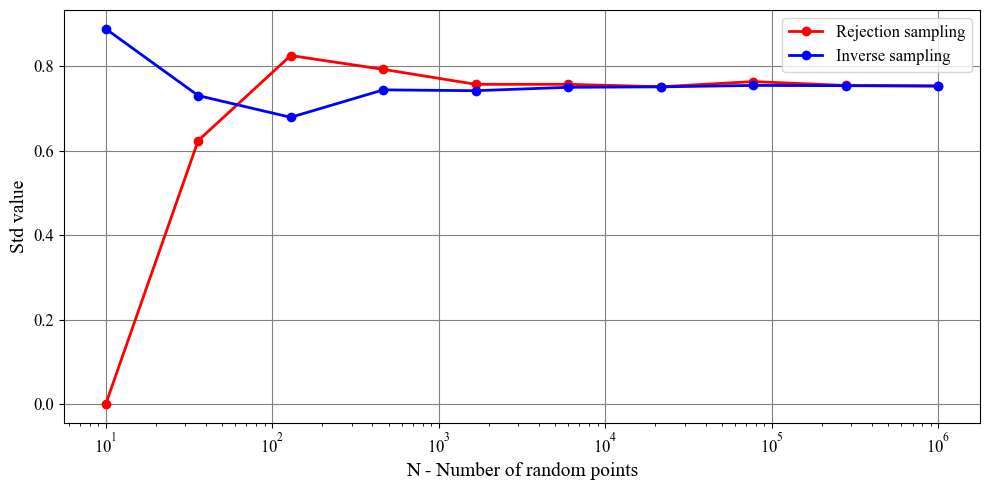

In [22]:
plt.plot(Ns, var1, marker='o', color='red', lw=2, label='Rejection sampling')
plt.plot(Ns, var2, marker='o', color='blue', lw=2, label='Inverse sampling')
plt.xscale('log')
plt.xlabel('N - Number of random points')
plt.ylabel('Std value')
plt.legend()

Theoretical distribution expectations:

I'm looking at the distribution of quasars measured redshift values in a specific volume (the reach of SDSS telescopes). Not knowing anything I would expect to observe a uniform distribution.\
But how do quasars form? Collision of galaxies? Accretion of matter around a common gravitational center?\
For what concernes the accretion of matter, I expect this process to be more efficient when the universe density was exceptionally high, as it was in the first billion years.\
 - I expect to observe low counts at very low $\approx 0$ redshift values since it is improbable to observe an active galactic nucleus in the local universe
 - I expect to observe a large number of counts in the z=1.5 region corresponding to $\approx 9 \times 10^{9}$ years. This is becouse of the peak of galaxy merger rate (There was a high enough number of galaxies but not high enough for them to be too far away from each other)
 - I also expect to observe a decreasing number of quasars at very high redshift, since for a massive black hole to form (at least $10^{6} M_{\odot}$) is required a lot of time (tens of milions of years)
  - I do not know why the distribution decrases so rapidely...